<a href="https://colab.research.google.com/github/Elish-Ab/AI-Mastery-10x-Week1/blob/task-1/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('raw_analyst_ratings.csv')

In [64]:
df.head(20)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [65]:
df.isnull().sum()

,0
Unnamed: 0,0
headline,0
url,0
publisher,0
date,0
stock,0


##Headline Length

In [66]:
df['headline_length'] = df['headline'].apply(len)

In [67]:
headline_stats = df['headline_length'].describe()
headline_stats

,headline_length
count,1.407328e+06
mean,7.312051e+01
std,4.073531e+01
min,3.000000e+00
25%,4.700000e+01
50%,6.400000e+01
75%,8.700000e+01
max,5.120000e+02


##Number of Publisher

In [68]:
publisher_counts = df['publisher'].value_counts()

## Daily Published Article Count

In [71]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
daily_article_counts = df['date'].dt.date.value_counts()

##**Visualization**

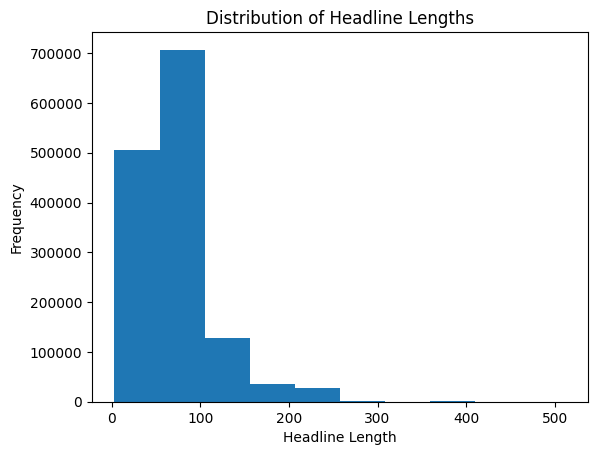

In [72]:
##headline lengths
plt.hist(df['headline_length'])
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.show()

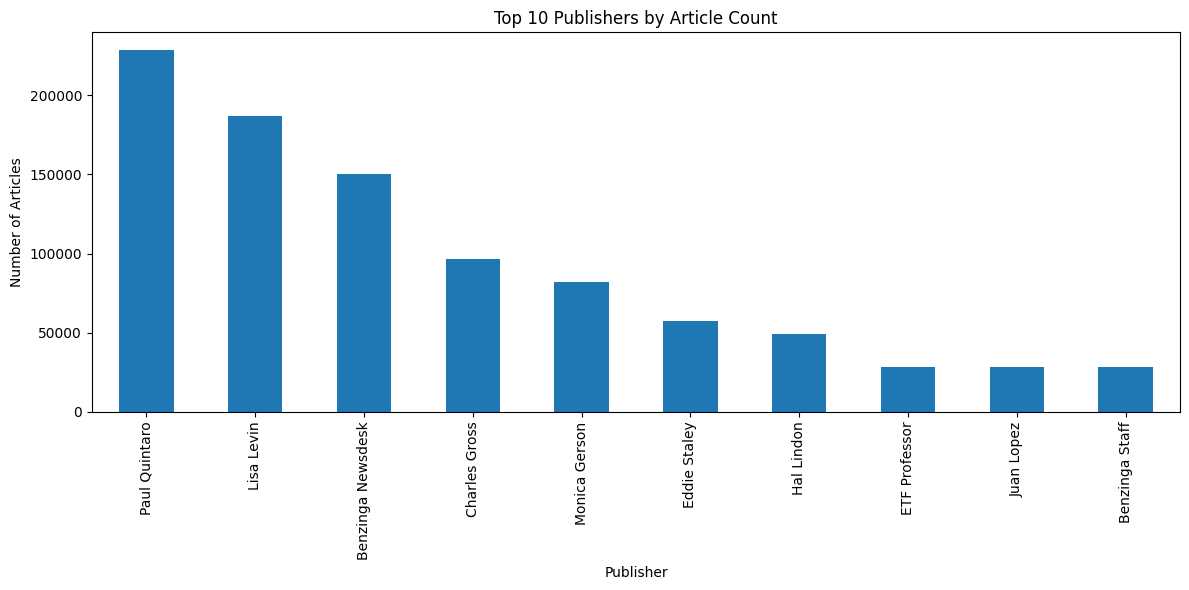

In [73]:
##top 10 publishers
top_publishers = publisher_counts.head(10)

plt.figure(figsize=(12, 6))
bar_plot = top_publishers.plot(kind='bar')

plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title(f'Top 10 Publishers by Article Count')

plt.tight_layout()
plt.show()

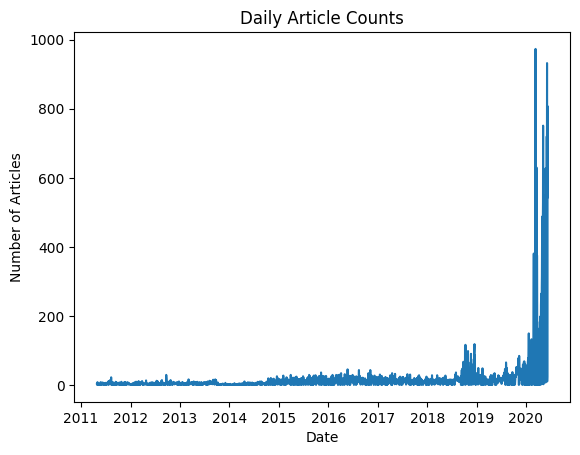

In [74]:
#daily article counts
daily_article_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Daily Article Counts')
plt.show()

##**Text Analysis**

Headline sentiment analysis using TextBlob

In [75]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to headlines
df['sentiment_score'] = df['headline'].apply(get_sentiment)

Topic Modeling for Keyword Extraction using nltk

In [78]:
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Tokenize and preprocess the headlines
stop_words = set(stopwords.words('english'))
df['headline_processed'] = df['headline'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words]))

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['headline_processed'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in df['headline_processed']]

# Apply LDA for topic modeling
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.show_topics(num_topics=5, num_words=5)


<ipython-input-80-07f49de946d7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(words, rotation=45)


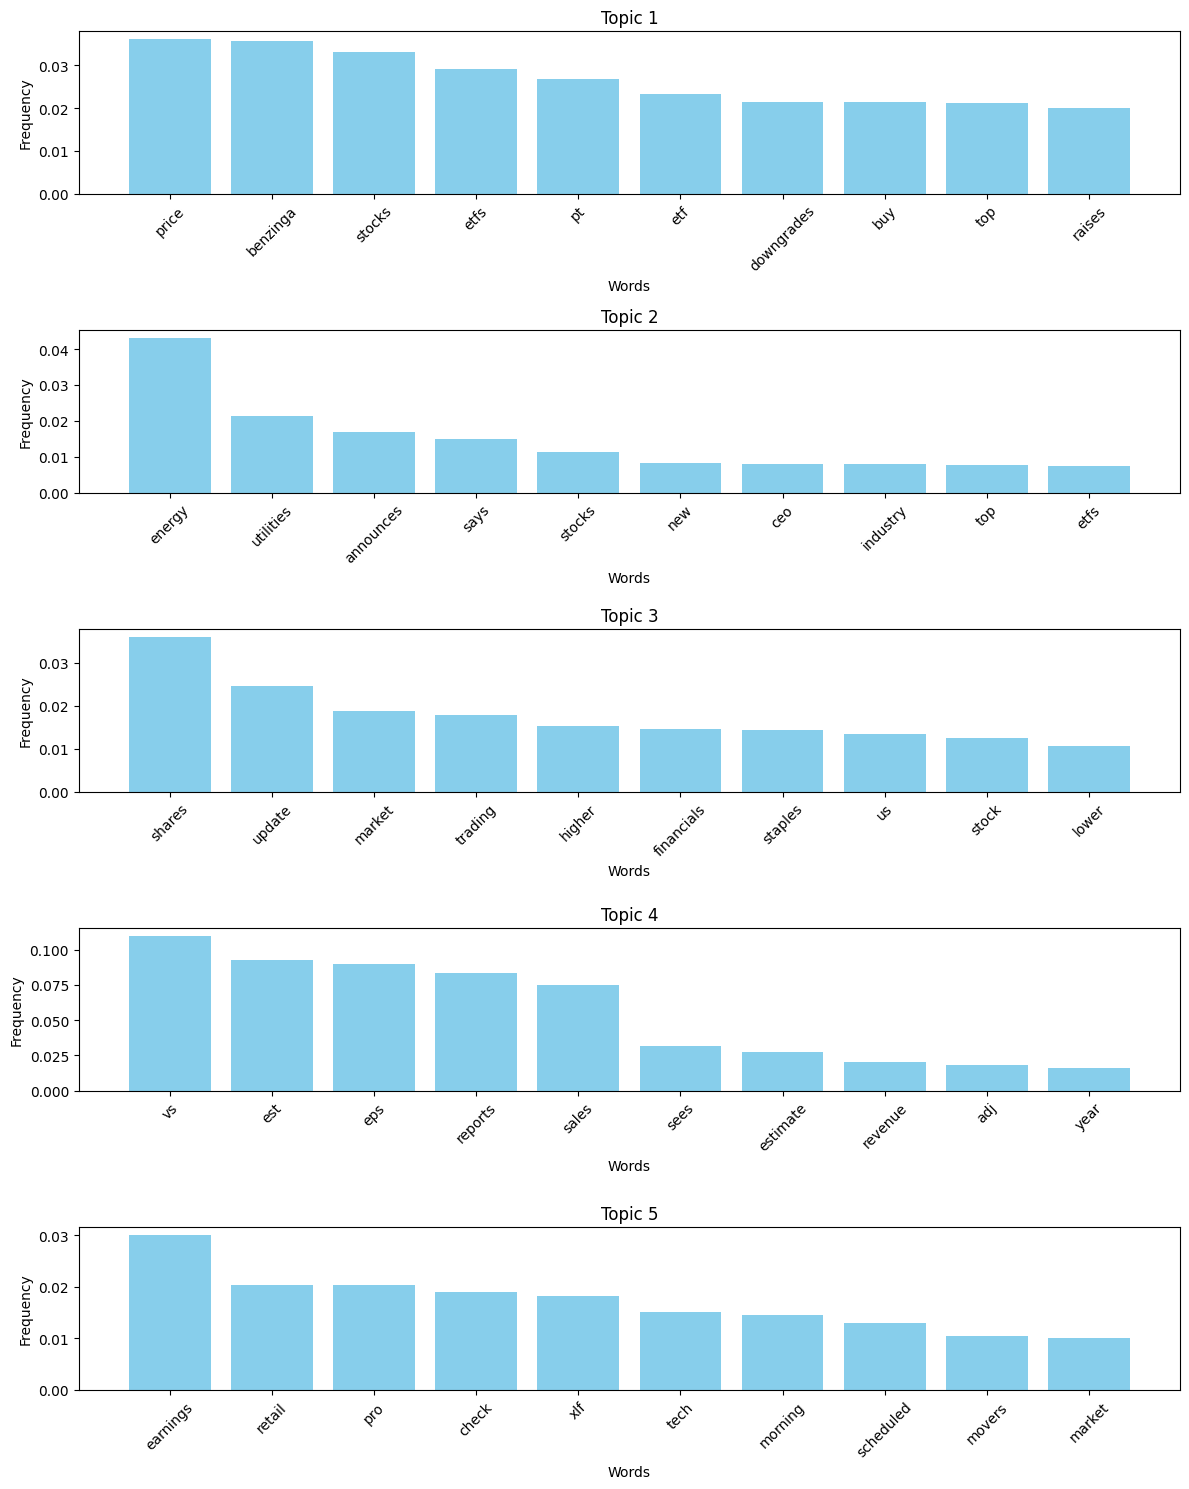

In [80]:

# Create a bar plot for the top words and their frequencies for each topic
fig, axs = plt.subplots(5, figsize=(12, 15))

for i, (topic_id, topic_words) in enumerate(topics):
    words = [word for word, _ in lda_model.show_topic(topic_id)]
    word_freqs = [freq for _, freq in lda_model.show_topic(topic_id)]

    axs[i].bar(words, word_freqs, color='skyblue')
    axs[i].set_title(f'Topic {topic_id + 1}')
    axs[i].set_xlabel('Words')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xticklabels(words, rotation=45)

plt.tight_layout()
plt.show()

##Time Series Analysis

Frequencey Analysis

In [79]:
publication_freq = df.resample('D', on='date').size()

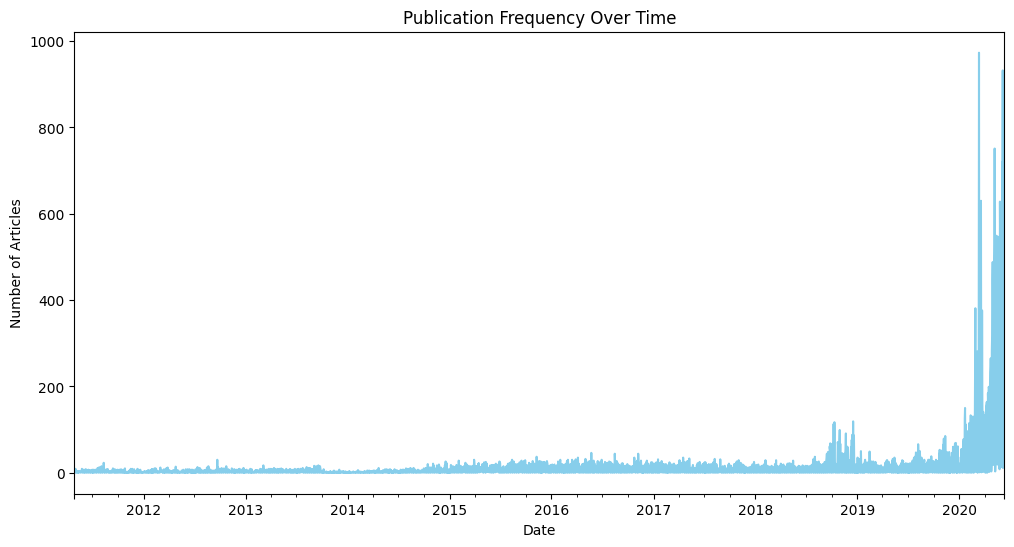

In [81]:
plt.figure(figsize=(12, 6))
publication_freq.plot(title='Publication Frequency Over Time', xlabel='Date', ylabel='Number of Articles', color='skyblue')
plt.show()

Publishing Time

In [82]:
df['publishing_time'] = df['date'].dt.time

In [83]:
publishing_time_counts = df['publishing_time'].value_counts()

In [88]:
publishing_time_counts.head()

,count
publishing_time,
16:10:12,846
14:49:42,505
15:16:30,294
14:34:27,246
16:22:40,215


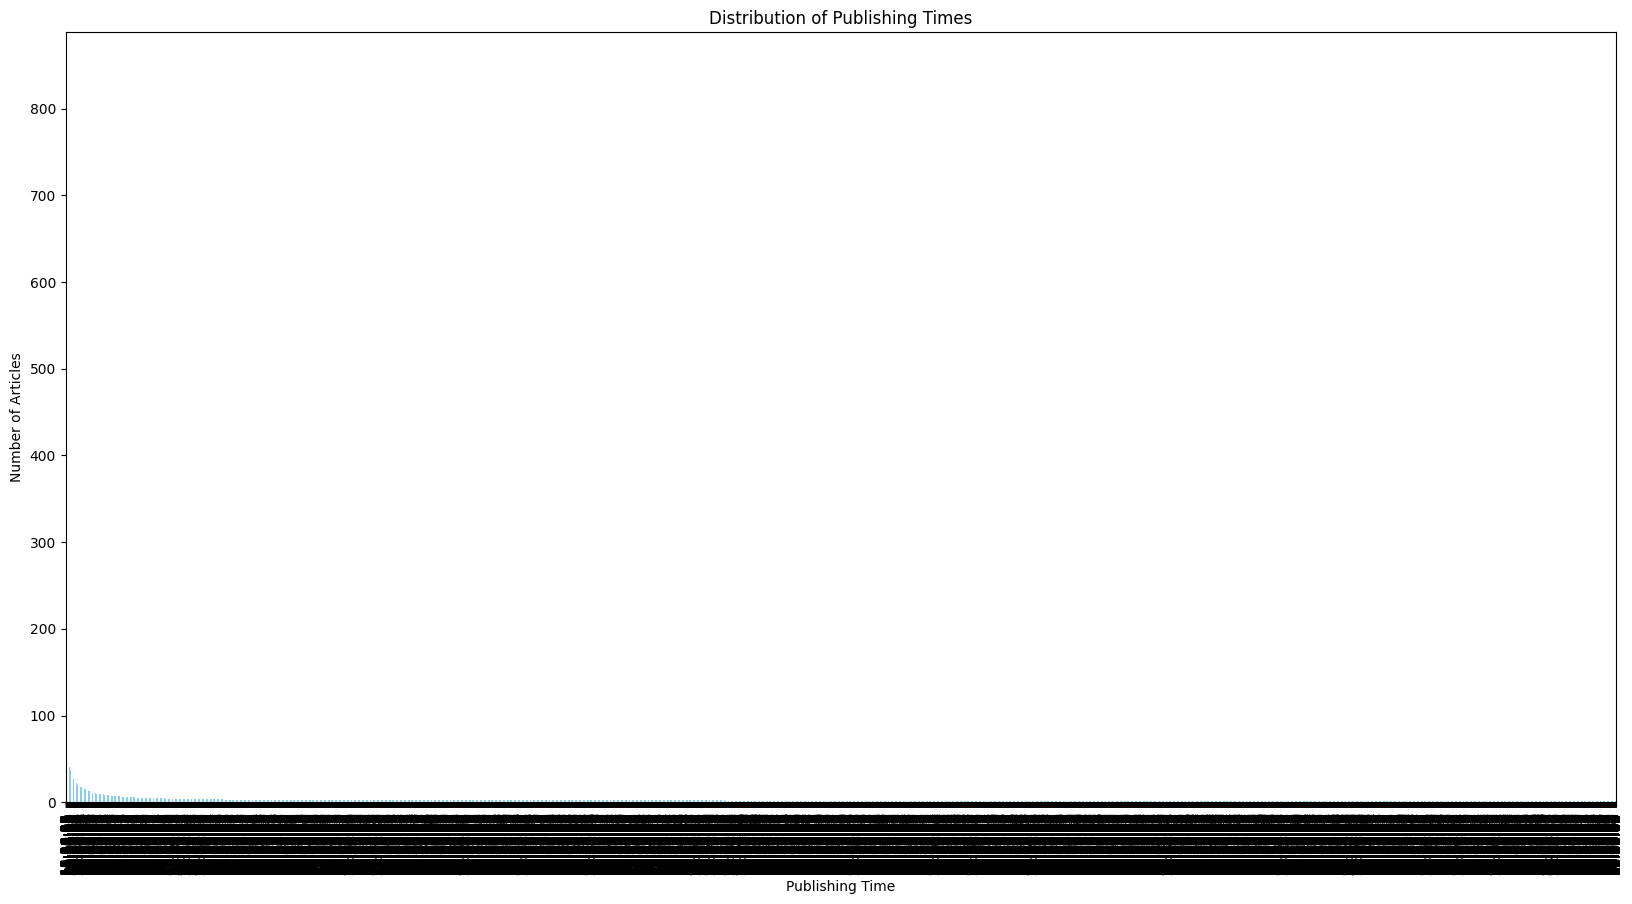

In [94]:
plt.figure(figsize=(20, 10))
publishing_time_counts.plot(kind='bar', title='Distribution of Publishing Times', xlabel='Publishing Time', ylabel='Number of Articles', color='skyblue')
plt.show()

## Top publishers and number news type

In [86]:
top_publishers_data = df[df['publisher'].isin(top_publishers.index)]

In [87]:
df['email_domain'] = df['publisher'].str.split('@').str[-1].str.lower()
unique_domains = df['email_domain'].nunique()

In [89]:
domain_counts = df['email_domain'].value_counts()

In [93]:
if 'news_type' in top_publishers_data.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='news_type', data=top_publishers_data, palette='viridis')
    plt.title('Types of News Reported by Top Publishers')
    plt.xlabel('Number of Articles')
    plt.ylabel('News Type')
    plt.show()
else:
    print("The 'news_type' column does not exist in the DataFrame.")

The 'news_type' column does not exist in the DataFrame.


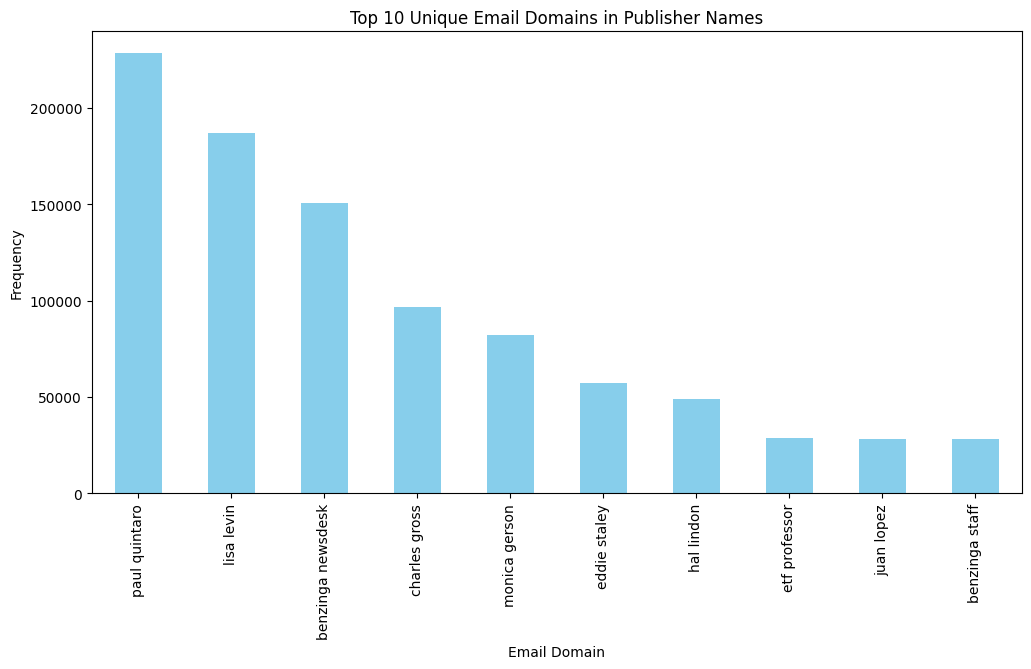

In [92]:
# Plotting the frequency of unique email domains
plt.figure(figsize=(12, 6))
domain_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Unique Email Domains in Publisher Names')
plt.xlabel('Email Domain')
plt.ylabel('Frequency')
plt.show()